In [51]:
%matplotlib inline

import time
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/ngrav/project/')
from wearables.scripts import data as weardata
from wearables.scripts import eval_ as weareval
from wearables.scripts import train_v71 as weartrain

In [2]:
with open('/home/ngrav/data/wearables/processed/MOD1000_modeldata.pkl', 'rb') as f:
    data = pickle.load(f)
    f.close()

In [5]:
data['data']['2180_35']['t']

2018-05-25 00:00:00   2018-05-25 00:00:00
2018-05-25 00:01:00   2018-05-25 00:01:00
2018-05-25 00:02:00   2018-05-25 00:02:00
2018-05-25 00:03:00   2018-05-25 00:03:00
2018-05-25 00:04:00   2018-05-25 00:04:00
                              ...        
2018-05-31 23:56:00   2018-05-31 23:56:00
2018-05-31 23:57:00   2018-05-31 23:57:00
2018-05-31 23:58:00   2018-05-31 23:58:00
2018-05-31 23:59:00   2018-05-31 23:59:00
2018-06-01 00:00:00   2018-06-01 00:00:00
Length: 10081, dtype: datetime64[ns]

In [6]:
md = pd.read_csv('/home/ngrav/data/wearables/raw/MOD_Data_2021.csv')

/home/ngrav/miniconda3/envs/wearables/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (16,22,36,77,97,117,137,195,215,235,255,275,315,335,426,440,462,463,465,466,485,506,536,577,581,625,626,627,668,671,673,674,697,700,701,703,704,705,708,709,712,713,730,798,799,804,807,808,812,817,818,822,880,881,885,886,890,891,908,1064,1067,1076,1084,1094,1095,1096,1097,1101,1102,1106,1132,1135,1136,1170,1250,1263,1577,1585,1586,1680,1739,1740,1741,1742,1743,1746,1747,1748,1749,1750,1870,1878,1879,1976,2166,2175,2188,2189,2203,2216,2217,2249,2250,2251,2252,2253,2256,2260,2261,2282,2283,2293,2294,2296,2297,2298,2299,2300,2303,2307,2308,2329,2340,2343,2344,2345,2346,2347,2350,2354,2355,2356,2376,2387,2390,2391,2392,2393,2394,2397,2401,2402,2423,2434,2437,2438,2439,2440,2441,2444,2448,2449,2450,2470,2471,2481,2484,2485,2486,2487,2488,2491,2495,2496,2517,2528,2531,2532,2533,2534,2535,2538,2542,2543,2544,2564,2575,2578,2579,2580,2581,2582,2585,2589,2590,2611,2622,2

In [9]:
md.head()

,record_id,redcap_event_name,redcap_survey_identifier,customid,refused_future_research___1,refused_future_research___2,refused_future_research___3,reader,reader_text,age_enroll,...,edinb3_3trim,edinb4_3trim,edinb5_3trim,edinb6_3trim,edinb7_3trim,edinb8_3trim,edinb9_3trim,edinb10_3trim,edinburgh_check_trim3___1,third_edinburgh_depression_scale_complete
0,4,general_arm_1,NaN,4,0,0,0,7.0,Kristi,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,6,general_arm_1,NaN,6,0,0,0,4.0,NaN,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,9,general_arm_1,NaN,9,0,0,0,4.0,NaN,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,10,general_arm_1,NaN,10,0,0,0,4.0,NaN,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,21,general_arm_1,NaN,21,0,0,0,4.0,NaN,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [26]:
pd.to_datetime(md.loc[md['record_id']==2180, 'edc'])

1071   2018-06-27
Name: edc, dtype: datetime64[ns]

In [27]:
(pd.to_datetime(md.loc[md['record_id']==2180, 'edc']).item() - data['data']['2180_35']['t'].iloc[0])

Timedelta('33 days 00:00:00')

In [24]:
(pd.to_datetime(md.loc[md['record_id']==2180, 'edc']).item() - data['data']['2180_35']['t'].iloc[0]).days / 7

4.714285714285714

In [18]:
data['data']['2180_35']['t'].iloc[0]

Timestamp('2018-05-25 00:00:00')

In [25]:
data['data']['2180_35']['t']

2018-05-25 00:00:00   2018-05-25 00:00:00
2018-05-25 00:01:00   2018-05-25 00:01:00
2018-05-25 00:02:00   2018-05-25 00:02:00
2018-05-25 00:03:00   2018-05-25 00:03:00
2018-05-25 00:04:00   2018-05-25 00:04:00
                              ...        
2018-05-31 23:56:00   2018-05-31 23:56:00
2018-05-31 23:57:00   2018-05-31 23:57:00
2018-05-31 23:58:00   2018-05-31 23:58:00
2018-05-31 23:59:00   2018-05-31 23:59:00
2018-06-01 00:00:00   2018-06-01 00:00:00
Length: 10081, dtype: datetime64[ns]

In [55]:
# check for all
label = {'uid': [], 
         'pid': [],
         'GA_filename': [],
         'GA_edc_sub_t0': []}
for uid in data['data'].keys():
    parts = uid.split('_')
    pid = int(parts[0])
    GA = int(parts[-1])
    t0 = data['data'][uid]['t'].iloc[0]
    edc = pd.to_datetime(md.loc[md['record_id']==pid, 'edc']).item()
    diff = (edc - t0).days
    label['uid'].append(uid)
    label['pid'].append(pid)
    label['GA_filename'].append(GA)
    label['GA_edc_sub_t0'].append(diff / 7) # wks
    

/home/ngrav/miniconda3/envs/wearables/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'GA_filename')

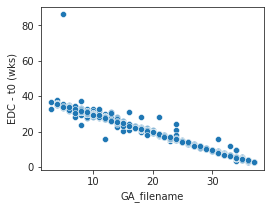

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sns.scatterplot(label['GA_filename'], label['GA_edc_sub_t0'], ax=ax)
ax.set_ylabel('EDC - t0 (wks)')
ax.set_xlabel('GA_filename')